In [ ]:
# !pip install qiskit==1.4.4 qiskit-machine-learning==0.8.4 qiskit-aer pylatexenc

In [ ]:
# !pip list | grep qiskit

In [ ]:
import warnings
warnings.filterwarnings('ignore')

 1. **EstimatorQNN vs SamplerQNN**

 <br>

 - **EstimatorQNN (The "Average")**
   - **What it does** : calculates the Expectation Value
   - **Output** : A single continuous number
   - **Requirements** : Observable
   - **Analogy** : You roll a die 100 times, but instead of counting the faces, you calculate the average score

<br>


<br>

 - **SamplerQNN (The "Counts")**
   - **What it does**: calculates the Probabilities of measuring specific bitstrings
   - **Output**: A list of probabilities
   - **Requirements**: "interpret" function to decide what "01" or "10" means
   - **Analogy**: You roll a die 100 times and count how many times each number appeared

 ---

 2. **Forward vs. Backward Pass**

 <br>

  - **Forward Pass (The Guess)**:
     - **Action**: The AI takes the input and calculates an answer.
     - **Analogy** : You shoot the arrow and see where it lands.
  
  <br>

  - **Backward Pass (The Correction)**:
    - **Action**: The AI checks how wrong its answer was and calculates how to adjust its "brain" (weights) to be better next time.
    - **Analogy** : You calculate: "I missed to the left, so I need to aim more to the right next time."

 <br>

 ---

<br>

 3. **Batches vs. Non-Batches**

 <br>

  - **Non-Batched (One by One)**:
    - **Action**: You feed the AI one piece of data at a time
    - **Analogy**: You shoot 1 arrow, walk to the target, check it, and adjust

    <br>

  - **Batched (Groups)**:
    - **Action**: You feed the AI a group of data all at once
    - **Analogy** : You shoot 10 arrows in a row, walk to the target, look at the average center of the group, and adjust your aim based on the group


---

### **Estimator QNN**

---

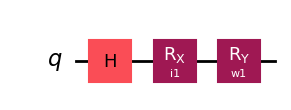

In [ ]:
# -----------------------------------------------------
# 1. define parameterized circuit
# -----------------------------------------------------
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

params = [Parameter('i1'), Parameter('w1')]
qc = QuantumCircuit(1)
qc.h(0)
qc.rx(params[0], 0)
qc.ry(params[1], 0)
qc.draw('mpl')

In [ ]:
# -----------------------------------------------------
# 2. define observables
# -----------------------------------------------------

from qiskit.quantum_info import SparsePauliOp

obs = SparsePauliOp.from_list([('Y' * qc.num_qubits, 1)])

In [ ]:
# -----------------------------------------------------
# 3. instantiate estimator qnn
# -----------------------------------------------------
from qiskit.primitives import StatevectorEstimator as Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN

estimator = Estimator()

estimator_qnn = EstimatorQNN(
    circuit=qc,
    observables=obs,
    input_params= [params[0]],
    weight_params=[params[1]],
    estimator=estimator
)


In [ ]:
# -----------------------------------------------------
# 4. forward pass
# -----------------------------------------------------
import numpy as np

estimator_qnn_input = np.random.random(estimator_qnn.num_inputs)
estimator_qnn_weight = np.random.random(estimator_qnn.num_weights)


print(f'Total input : {estimator_qnn.num_inputs}')
print(f'Total weight : {estimator_qnn.num_weights}')

print(f'\nInputs : {estimator_qnn_input}')
print(f'Weights : {estimator_qnn_weight}\n')

est_qnn_forward = estimator_qnn.forward(
      estimator_qnn_input,
      estimator_qnn_weight
)

print(f'Output : {est_qnn_forward}')


Total input : 1
Total weight : 1

Inputs : [0.09870296]
Weights : [0.44986734]

Output : [[0.0214784]]


In [ ]:
# -----------------------------------------------------
# 5. backward pass
# -----------------------------------------------------
est_qnn_input_grad, est_qnn_weight_grad = estimator_qnn.backward(
      estimator_qnn_input,
      estimator_qnn_weight
)

print(f'Input gradients : {est_qnn_input_grad}')
print(f'Weight gradients : {est_qnn_weight_grad}, Shape : {est_qnn_weight_grad.shape}')

Input gradients : None
Weight gradients : [[[-5.20417043e-18]]], Shape : (1, 1, 1)


### **Sampler QNN**

---

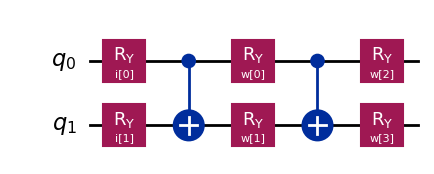

In [ ]:
# -----------------------------------------------------
# 1. Define parameterized circuit
# -----------------------------------------------------
from qiskit.circuit import ParameterVector

inputs = ParameterVector('i', 2)
weights = ParameterVector('w', 4)

qc2 = QuantumCircuit(2)
qc2.ry(inputs[0], 0)
qc2.ry(inputs[1], 1)

qc2.cx(0, 1)
qc2.ry(weights[0], 0)
qc2.ry(weights[1], 1)

qc2.cx(0, 1)
qc2.ry(weights[2], 0)
qc2.ry(weights[3], 1)

qc2.draw('mpl')

In [ ]:
# -----------------------------------------------------
# 2. instantiate samplerQNN
# -----------------------------------------------------
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import Sampler

sampler = Sampler()

sampler_qnn = SamplerQNN(
    circuit=qc2,
    input_params=inputs,
    weight_params=weights,
    sampler=sampler
)

In [ ]:
# -----------------------------------------------------
# 3. forward pass
# -----------------------------------------------------
sampler_qnn_inputs = np.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = np.random.random(sampler_qnn.num_weights)


print(f'Total input : {sampler_qnn.num_inputs}')
print(f'Total weight : {sampler_qnn.num_weights}')

print(f'\nInputs : {sampler_qnn_inputs}')
print(f'Weights : {sampler_qnn_weights}\n')

sampler_qnn_forward = sampler_qnn.forward(
      sampler_qnn_inputs,
      sampler_qnn_weights
)

print(f'Output : {sampler_qnn_forward}')

Total input : 2
Total weight : 4

Inputs : [0.05753002 0.47004486]
Weights : [0.50046529 0.92916613 0.92276899 0.51548297]

Output : [[0.19598034 0.13646617 0.36418255 0.30337093]]


In [ ]:
# -----------------------------------------------------
# 4. backward pass
# -----------------------------------------------------
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
      sampler_qnn_inputs,
      sampler_qnn_weights
)

print(f'Input gradients : {sampler_qnn_input_grad}')
print(f'Weight gradients : {sampler_qnn_weight_grad}, Shape : {sampler_qnn_weight_grad.shape}')

Input gradients : None
Weight gradients : [[[-0.13153152 -0.35566221 -0.16353803 -0.26715655]
  [ 0.11334598 -0.05492096  0.16353803 -0.20346958]
  [-0.35781572  0.33899786 -0.33238893  0.26715655]
  [ 0.37600125  0.0715853   0.33238893  0.20346958]]], Shape : (1, 4, 4)


---